In [107]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [105]:
id_code = pd.read_csv("../stock_prj/data/id_code.csv")
id_code

,num,name,class
0,100001,동화약품,kospi
1,100002,KR모터스,kospi
2,100003,경방,kospi
3,100004,메리츠화재,kospi
4,100005,삼양홀딩스,kospi
...,...,...,...
2901,201839,대신밸런스제9호스팩,kosdaq
2902,201840,신한제7호스팩,kosdaq
2903,201841,IBKS제15호스팩,kosdaq
2904,201842,에이치디,kosdaq


In [99]:
crawling_list = glob.glob("../stock_prj/result/*.csv")
len(crawling_list)

1749

## 크롤링 완료 개수

In [100]:
# id_code의 기업 번호와 기업 이름으로  dictionary 만들기
id_dict = dict(zip(id_code["num"], id_code["name"]))

In [101]:
temp_dict = id_dict.copy()
cnt = len(id_dict)
total_news = 0
for file in crawling_list:
    name = file.split("\\")[-1].split("_")[-1].split(".")[0]
    name = name.replace("+", " ")
    name  = name.replace("_", "&")
    num =int(file.split("\\")[-1].split("_")[-2])
    if num in list(id_dict.keys()) or name == id_dict[num]:
        cnt -= 1
        tmp = pd.read_csv(file)
        total_news += tmp.shape[0]
print(cnt, total_news)

1157 715505


In [102]:
# # 중복된 이름 처리

# df_1 = pd.read_csv("../stock_prj/result/crawling_result_200740_제넥신.csv")
# df_2 = pd.read_csv("../stock_prj/result/crawling_result_200740_제넥신_2.csv")

# total = pd.concat([df_1,df_2]).drop_duplicates().reset_index(drop=True)
# total.to_csv("../stock_prj/result/crawling_result_200740_제넥신.csv", index=False, encoding='utf-8-sig')

## 기업 수 파이 차트

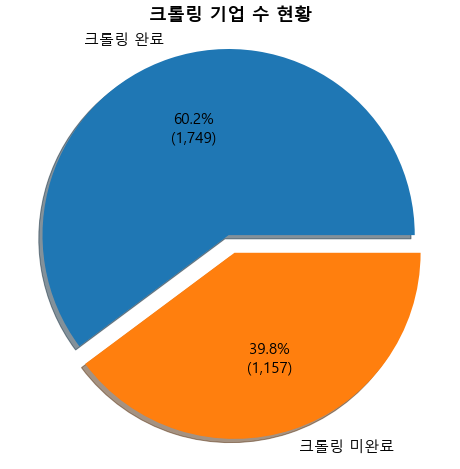

In [108]:
# complete = len(complete_list)
complete = 2906-cnt
labels = ['크롤링 완료', '크롤링 미완료']
sizes = [complete, 2906-complete]
explode = (0, 0.1)

def absolute_value(val, sizes):
    absolute = int(np.round(val/100.*np.sum(sizes)))
    return f"{val:.1f}%\n({absolute:,})"


plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, autopct=lambda pct:absolute_value(pct, sizes), shadow=True, textprops={'fontsize': 15})
plt.title("크롤링 기업 수 현황", fontdict={"fontsize":18, "weight":"bold"})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
total = pd.DataFrame()
all_url = glob.glob("./data/crawling_*.csv")
for url in all_url:
    tmp_df = pd.read_csv(url)
    total = pd.concat([total, tmp_df])
    total = total.drop_duplicates(subset=['name', 'url'])
total.to_csv("./data/total_crawling_list.csv", index=False)
print(len(total))